# **Entendimento dos Dados (Data Understanding)**

Equipe:
* Beatriz Andrade de Miranda - bam2@cin.ufpe.br
* Camila Siqueira Lins - csl2@cin.ufpe.br
* Luisa Cavalcante - lncc@cin.ufpe.br
* Nicolly Lira Albuquerque - nla@cin.ufpe.br


## 1. Introdução

In [1]:
!pip install ucimlrepo

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from collections import Counter
from ucimlrepo import fetch_ucirepo

In [3]:
# Configurações gerais dos plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Coleta de dados

Fonte dos Dados: UCI Machine Learning Repository - Statlog (Shuttle) Dataset

In [4]:
statlog_shuttle = fetch_ucirepo(id=148)
X = statlog_shuttle.data.features
y = statlog_shuttle.data.targets
df = pd.DataFrame(X)


In [5]:
df.columns

Index(['Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close',
       'Bpv Open'],
      dtype='object')

In [6]:
df['class'] = y
df

Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  class
50 21        77          0        28     0      27         48        22      2
55 0         92          0         0    26      36         92        56      4
53 0         82          0        52    -5      29         30         2      1
37 0         76          0        28    18      40         48         8      1
   0         79          0        34   -26      43         46         2      1
...         ...        ...       ...   ...     ...        ...       ...    ...
80 0         84          0       -36   -29       4        120       116      5
55 0         81          0       -20    25      26        102        76      4
   0         77          0        12   -22      22         65        42      4
37 0        103          0        18   -16      66         85        20      1
56 2         98          0        52     1      42         46         4      4

[58000 rows x 8 columns]

In [7]:
print(f"Número de amostras: {df.shape[0]}")
print(f"Número de atributos (incluindo o alvo): {df.shape[1]}")

Número de amostras: 58000
Número de atributos (incluindo o alvo): 8


## 3. Descrição dos dados

In [8]:
print("\nTipos de dados por coluna:")
print(df.dtypes)


Tipos de dados por coluna:
Rad Flow     int64
Fpv Close    int64
Fpv Open     int64
High         int64
Bypass       int64
Bpv Close    int64
Bpv Open     int64
class        int64
dtype: object


        1       Rad Flow
        2       Fpv Close
        3       Fpv Open
        4       High
        5       Bypass
        6       Bpv Close
        7       Bpv Open

In [9]:
df_count = df.copy()
df_count['class'] = df_count['class'].replace({1:'Rad Flow',2:'Fpv Close',3:'Fpv Open', 4:'High',5:'Bypass',6:'Bpv Close',7:'Bpv Open'} )

In [10]:
df_count['class'].value_counts().reset_index()

,class,count
0,Rad Flow,45586
1,High,8903
2,Bypass,3267
3,Fpv Open,171
4,Fpv Close,50
5,Bpv Open,13
6,Bpv Close,10


In [11]:
df_rad_flow = df_count[df_count['class'] == 'Rad Flow']
df_high = df_count[df_count['class'] == 'High']
df_bypass = df_count[df_count['class'] == 'Bypass']
df_fpv_open = df_count[df_count['class'] == 'Fpv Open']
df_fpv_close = df_count[df_count['class'] == 'Fpv Close']
df_bpv_open = df_count[df_count['class'] == 'Bpv Open']
df_bpv_close = df_count[df_count['class'] == 'Bpv Close']

In [12]:
print("\nResumo estatístico:")
df_count.describe()


Resumo estatístico:


,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,58000.000000,58000.000000,58000.000000,58000.000000,58000.000000,58000.000000,58000.000000
mean,85.349121,0.259672,34.549862,1.608190,37.092310,50.884552,13.932414
std,8.902769,36.521516,21.660139,217.597675,13.111428,21.418051,25.614018
min,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000
25%,79.000000,0.000000,26.000000,-5.000000,32.000000,37.000000,0.000000
50%,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000
75%,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000
max,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


In [13]:
df_rad_flow.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000
mean,84.729062,0.308604,39.265038,2.245843,40.749660,45.448734,4.894924
std,8.673120,37.438750,14.059570,170.628789,9.840725,15.485259,9.769369
min,21.000000,-3939.000000,-188.000000,-12809.000000,-16.000000,-258.000000,-298.000000
25%,79.000000,0.000000,36.000000,-4.000000,35.000000,35.000000,0.000000
50%,82.000000,0.000000,42.000000,0.000000,40.000000,41.000000,2.000000
75%,87.000000,0.000000,46.000000,6.000000,43.000000,51.000000,2.000000
max,149.000000,3830.000000,336.000000,15164.000000,105.000000,265.000000,226.000000


In [14]:
df_high.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,8903.000000,8903.000000,8903.000000,8903.000000,8903.000000,8903.000000,8903.000000
mean,86.595417,0.515781,21.745254,-1.435022,30.979782,65.200382,34.173874
std,8.939201,30.027542,25.788971,213.528892,8.873334,20.311732,26.063320
min,71.000000,-22.000000,-188.000000,-13839.000000,16.000000,31.000000,4.000000
25%,78.000000,0.000000,-2.000000,-7.000000,22.000000,49.000000,10.000000
50%,82.000000,0.000000,24.000000,0.000000,26.000000,58.000000,32.000000
75%,96.000000,0.000000,46.000000,5.000000,40.000000,82.000000,58.000000
max,100.000000,2674.000000,52.000000,9931.000000,44.000000,269.000000,244.000000


In [15]:
df_bypass.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000
mean,90.336088,-1.115396,4.651974,1.340986,2.873584,86.446893,83.444751
std,9.606415,39.682263,45.108427,556.925246,2.476515,37.063894,35.843731
min,29.000000,-2044.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000
25%,84.000000,0.000000,-38.000000,-2.000000,1.000000,38.000000,36.000000
50%,86.000000,0.000000,-4.000000,0.000000,3.000000,92.000000,88.000000
75%,102.000000,0.000000,70.000000,5.000000,4.000000,121.000000,116.000000
max,109.000000,50.000000,436.000000,8098.000000,5.000000,270.000000,266.000000


In [16]:
df_fpv_open.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,91.602339,-0.017544,27.520468,-4.029240,37.105263,64.087719,27.157895
std,12.821618,41.058993,24.009395,8.609452,16.403749,18.395601,21.103490
min,75.000000,-362.000000,-2.000000,-36.000000,8.000000,34.000000,2.000000
25%,78.000000,0.000000,6.000000,-5.000000,28.500000,45.000000,6.000000
50%,89.000000,0.000000,30.000000,0.000000,35.000000,72.000000,22.000000
75%,106.000000,0.000000,44.000000,0.000000,42.500000,81.000000,46.000000
max,112.000000,365.000000,70.000000,17.000000,75.000000,88.000000,74.000000


In [17]:
df_fpv_close.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000
mean,78.760000,0.0,-5.360000,0.380000,25.640000,84.920000,59.320000
std,2.254791,0.0,32.901684,7.241857,8.815015,35.474532,41.613597
min,77.000000,0.0,-42.000000,-8.000000,10.000000,37.000000,6.000000
25%,77.000000,0.0,-40.000000,0.000000,18.500000,48.000000,16.000000
50%,77.000000,0.0,-22.000000,0.000000,28.000000,101.000000,67.000000
75%,82.000000,0.0,28.000000,0.000000,32.750000,123.000000,106.000000
max,82.000000,0.0,42.000000,28.000000,38.000000,126.000000,116.000000


In [18]:
df_bpv_open.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,92.230769,5.153846,30.307692,0.769231,55.230769,61.615385,6.923077
std,15.487381,13.915496,6.263447,9.238992,15.487381,13.232148,5.392302
min,75.000000,-4.000000,20.000000,-10.000000,38.000000,40.000000,2.000000
25%,76.000000,-1.000000,28.000000,-2.000000,39.000000,55.000000,4.000000
50%,106.000000,0.000000,34.000000,-1.000000,69.000000,72.000000,4.000000
75%,106.000000,3.000000,34.000000,3.000000,69.000000,72.000000,8.000000
max,106.000000,40.000000,36.000000,21.000000,69.000000,75.000000,16.000000


In [19]:
df_bpv_close.describe()

,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,90.200000,-1.90000,32.800000,-4.900000,19.400000,57.100000,37.600000
std,14.069668,1.72884,8.283853,16.134504,10.500794,13.312066,10.232845
min,75.000000,-4.00000,20.000000,-35.000000,3.000000,38.000000,24.000000
25%,77.750000,-3.00000,29.500000,-13.250000,14.250000,46.000000,31.000000
50%,85.000000,-2.50000,34.000000,0.000000,20.000000,56.000000,34.000000
75%,106.000000,0.00000,35.500000,0.000000,23.750000,71.250000,47.000000
max,106.000000,0.00000,44.000000,26.000000,42.000000,72.000000,54.000000


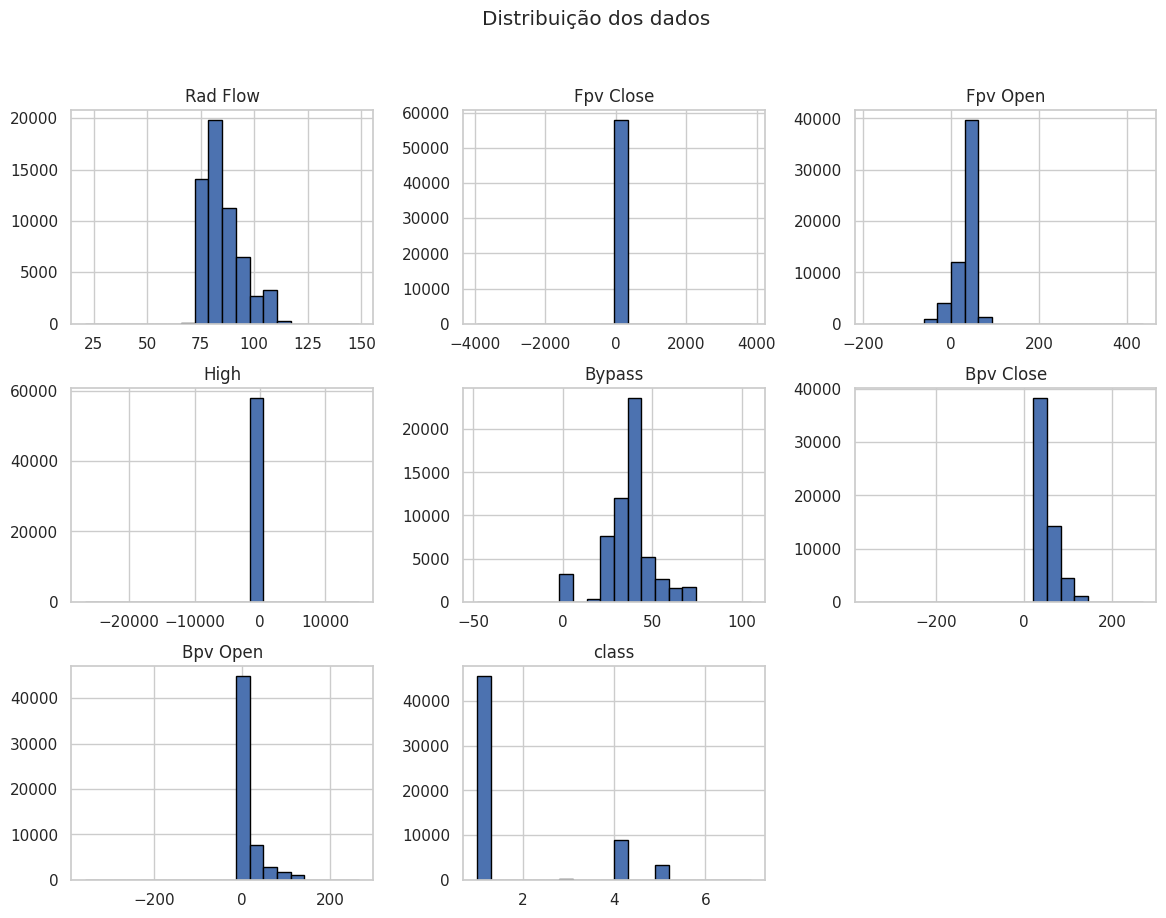

In [20]:
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados')
plt.show()

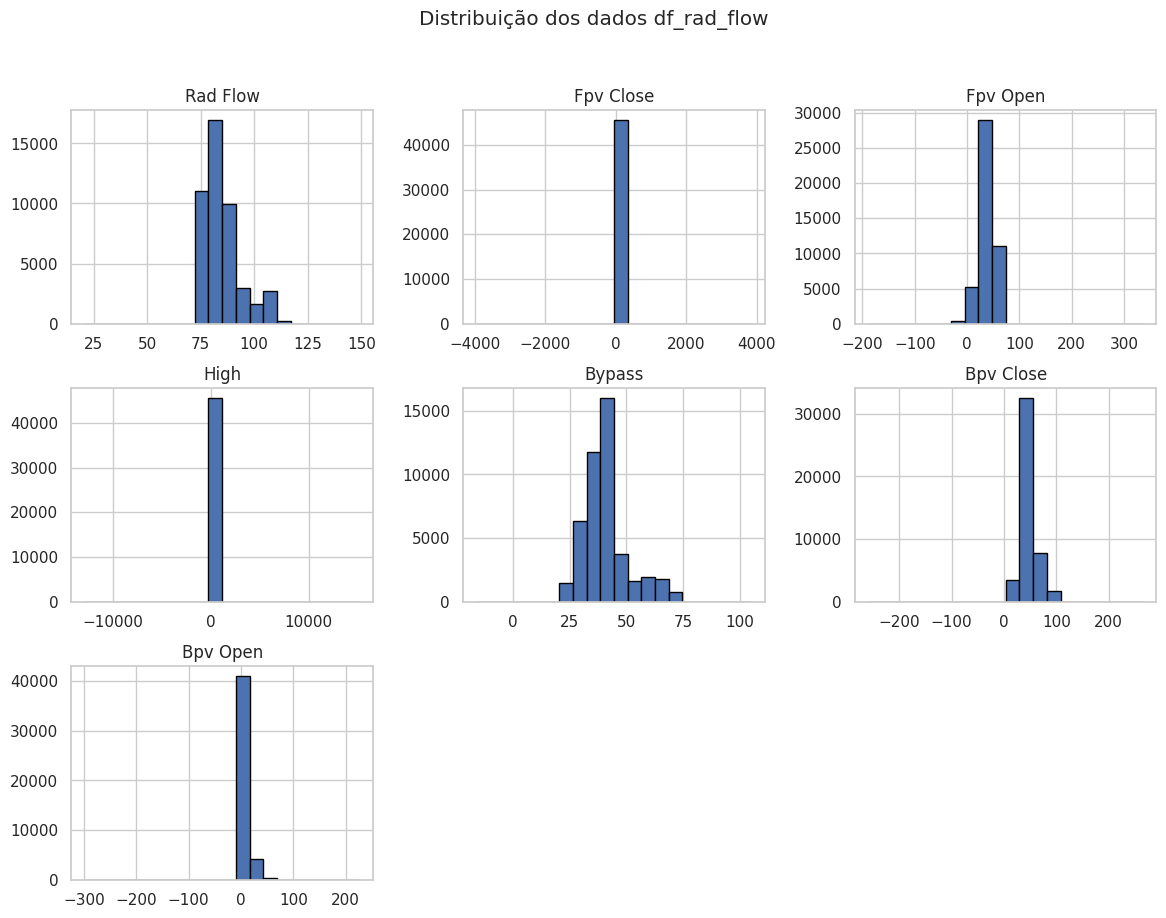

In [21]:
df_rad_flow.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados df_rad_flow ')
plt.show()

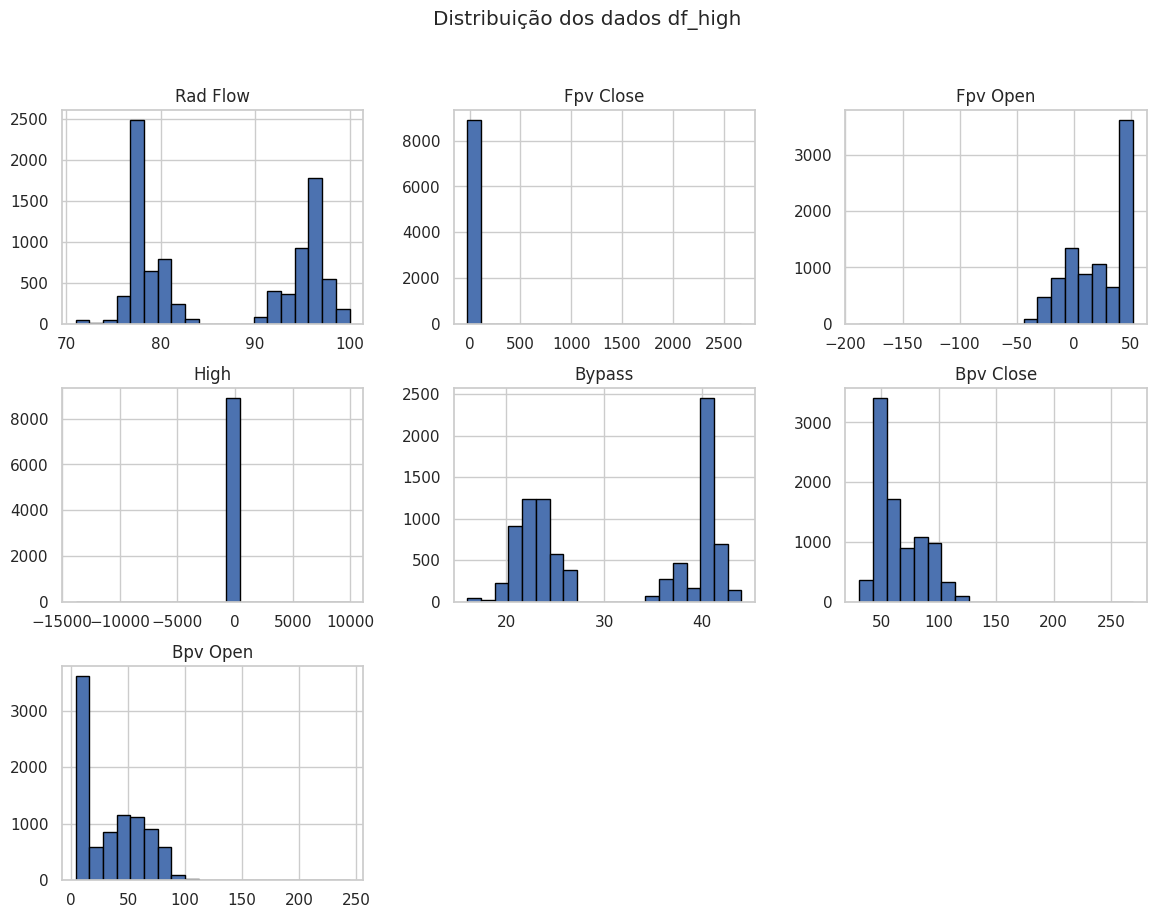

In [22]:
df_high.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados df_high')
plt.show()

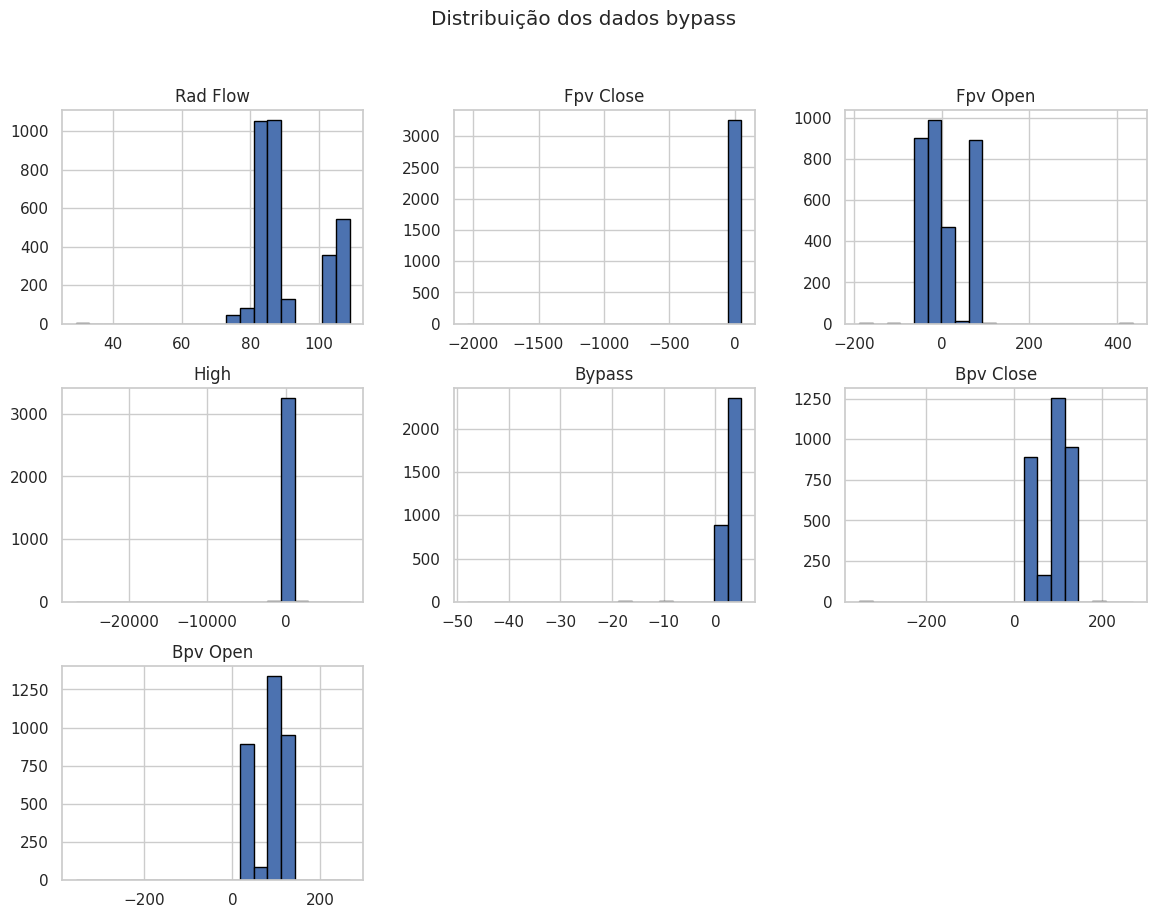

In [23]:
df_bypass.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados bypass ')
plt.show()

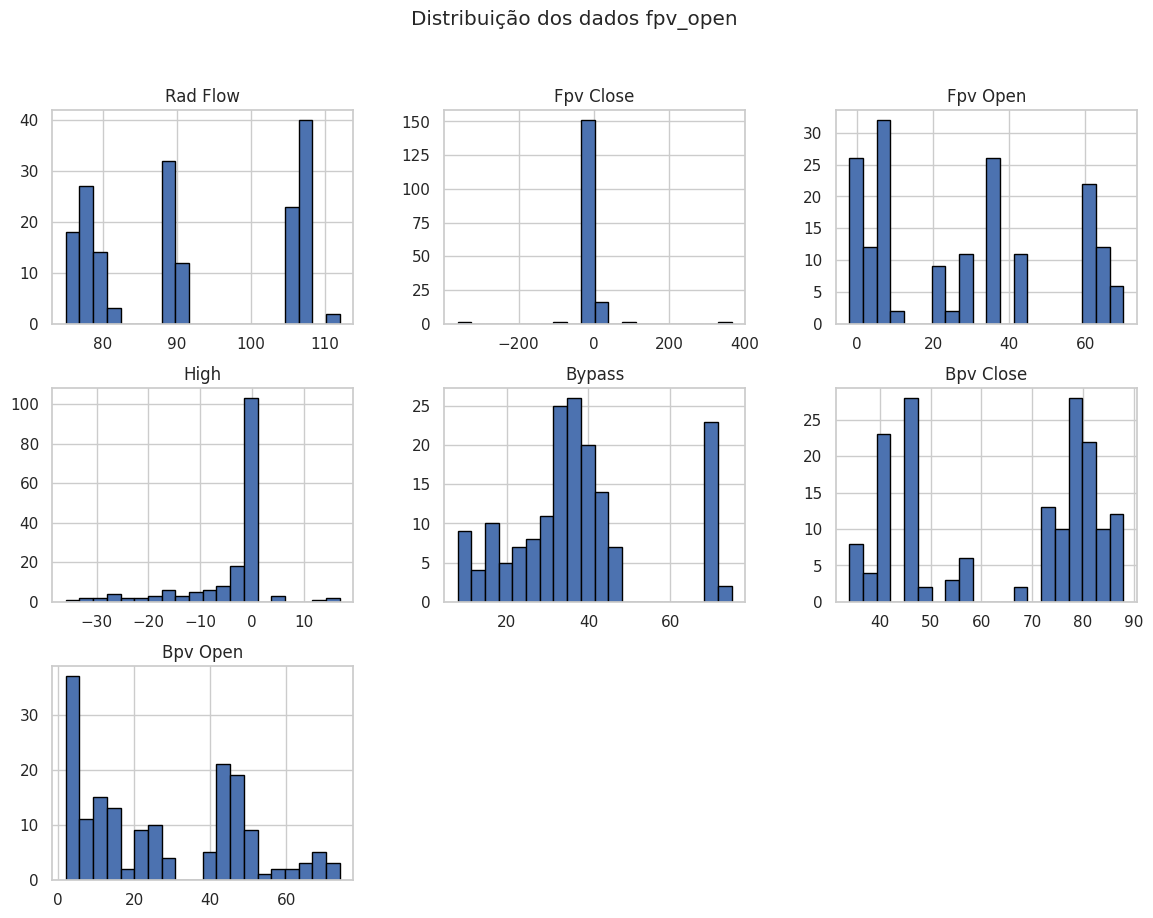

In [24]:
df_fpv_open.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados fpv_open ')
plt.show()

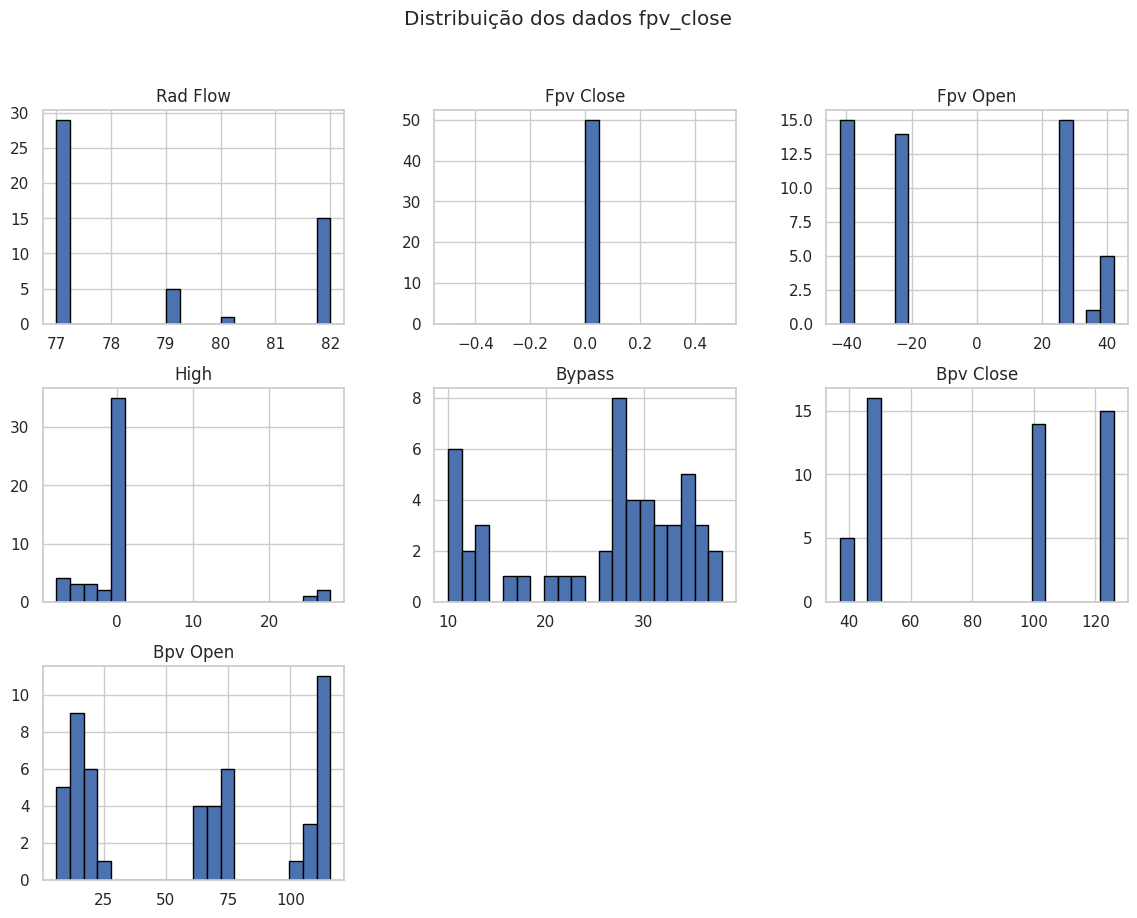

In [25]:
df_fpv_close.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados fpv_close')
plt.show()

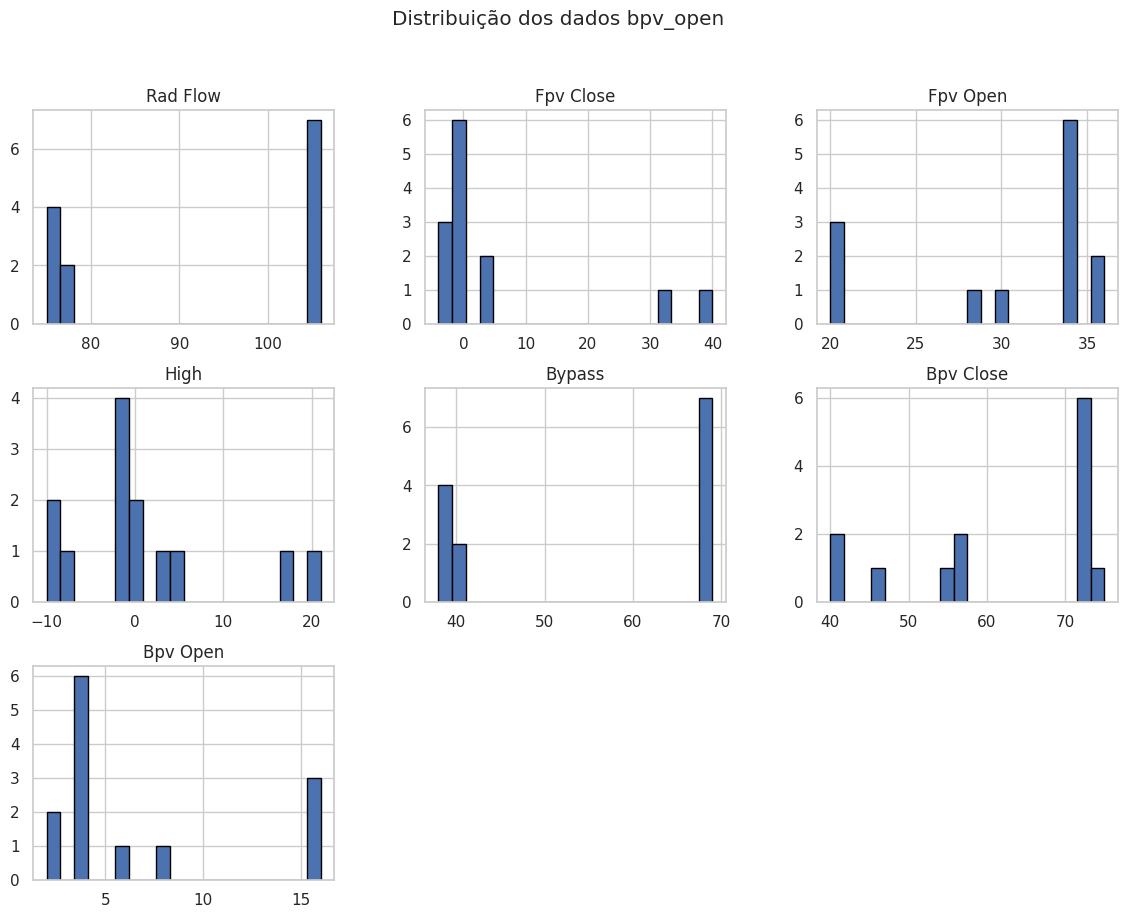

In [26]:
df_bpv_open.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados bpv_open')
plt.show()

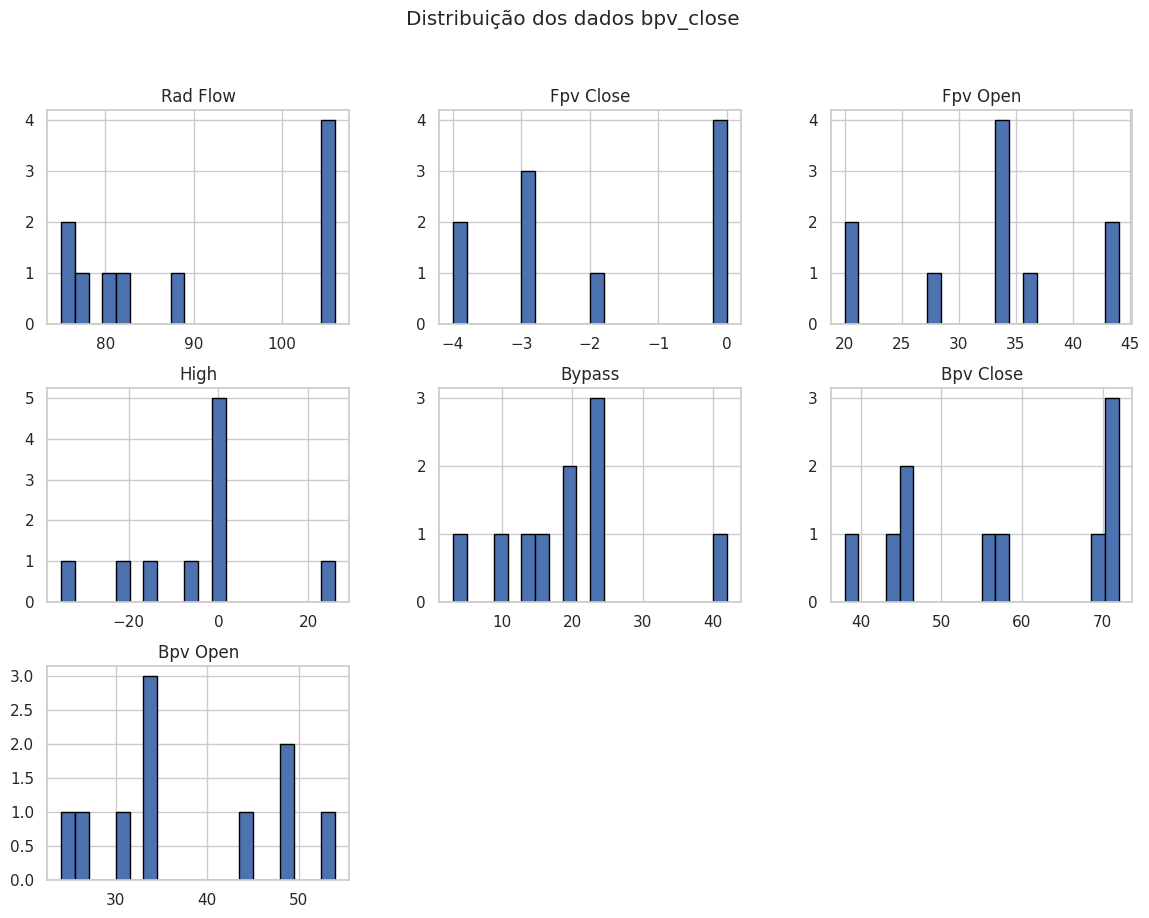

In [27]:
df_bpv_close.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribuição dos dados bpv_close')
plt.show()

## 4. Exploração dos Dados

### 4.1 Análise de Valores Ausentes

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58000 entries, (50, 21) to (56, 2)
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Rad Flow   58000 non-null  int64
 1   Fpv Close  58000 non-null  int64
 2   Fpv Open   58000 non-null  int64
 3   High       58000 non-null  int64
 4   Bypass     58000 non-null  int64
 5   Bpv Close  58000 non-null  int64
 6   Bpv Open   58000 non-null  int64
 7   class      58000 non-null  int64
dtypes: int64(8)
memory usage: 3.7 MB


In [29]:
df.isnull().sum()

,0
Rad Flow,0
Fpv Close,0
Fpv Open,0
High,0
Bypass,0
Bpv Close,0
Bpv Open,0
class,0


### 4.2 Análise de Outliers

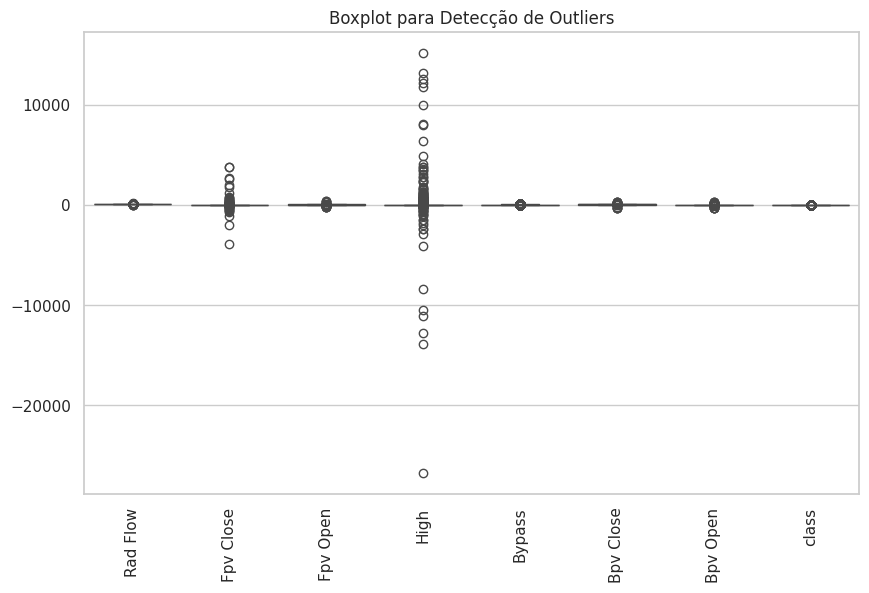

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot para Detecção de Outliers')
plt.xticks(rotation=90)
plt.show()

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por coluna:")
print(outliers)

Número de outliers por coluna:
Rad Flow      3570
Fpv Close    19945
Fpv Open      3570
High          8187
Bypass        7468
Bpv Close     2747
Bpv Open      7767
class        12414
dtype: int64


### 4.3 Correlação entre as variáveis

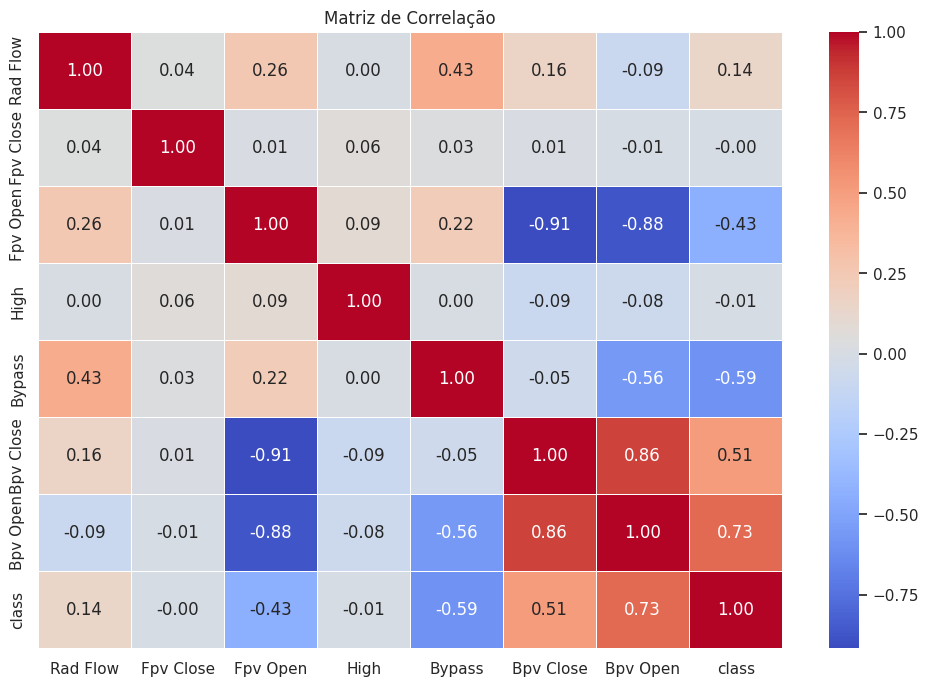

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

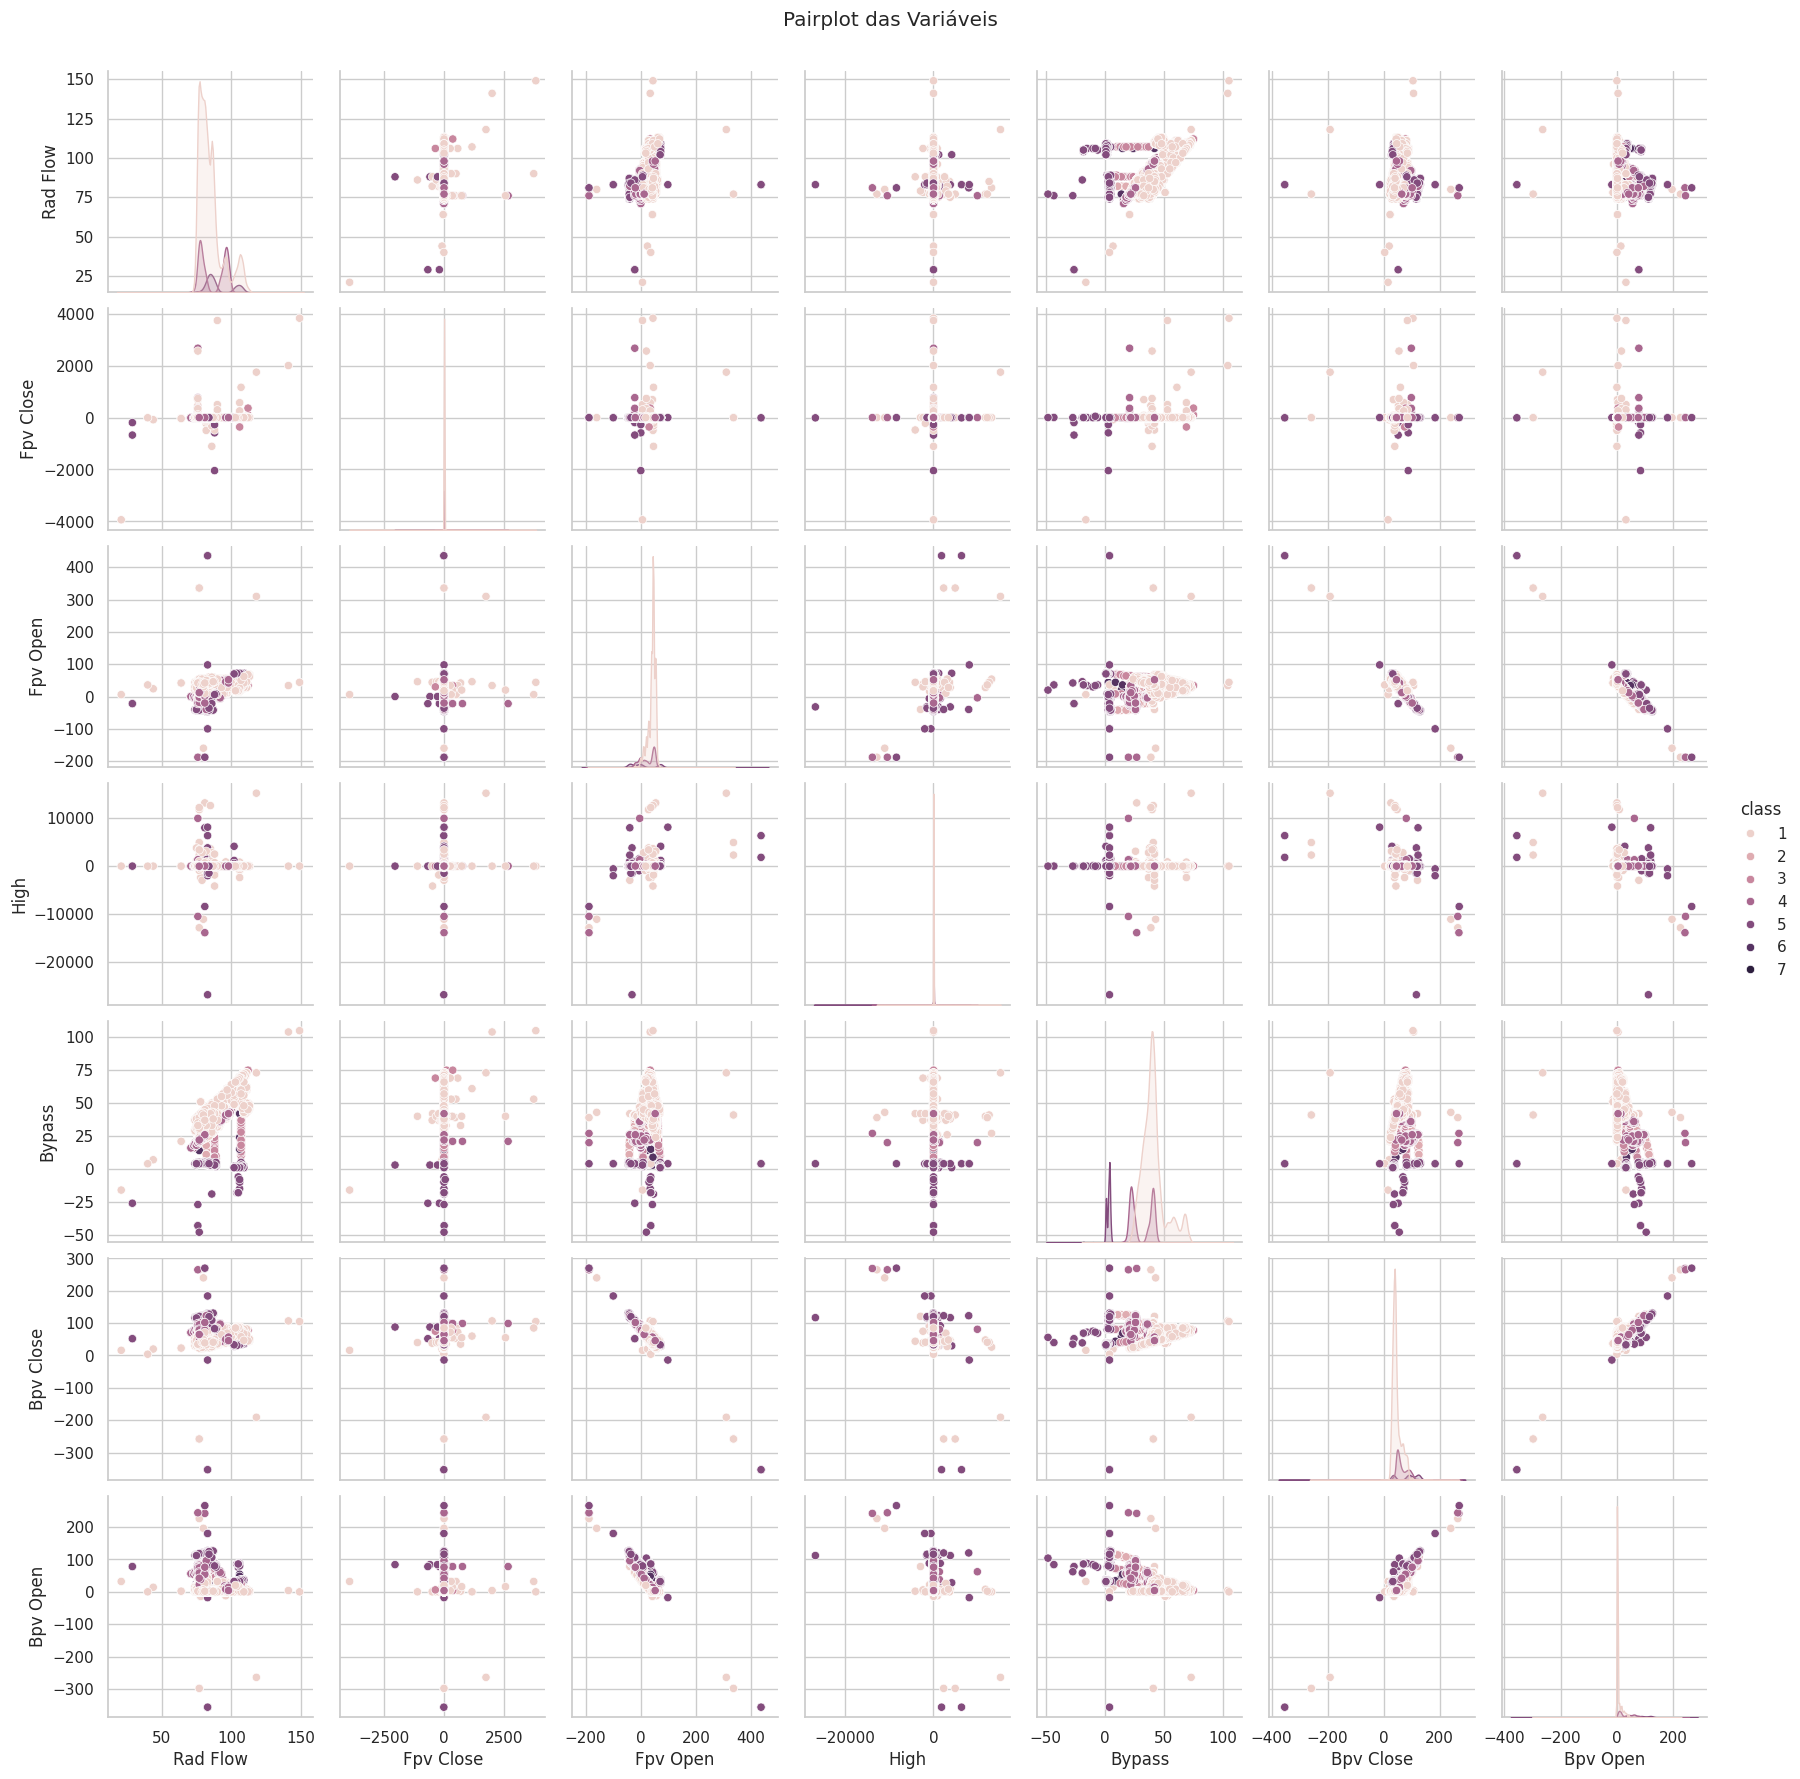

In [33]:
sns.pairplot(df, hue='class')
plt.suptitle('Pairplot das Variáveis', y=1.02)
plt.show()

## 5. Verificação da Qualidade dos Dados


In [34]:
duplicates = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 16354


In [35]:
neg_values = (df < 0).sum()
print("\nNúmero de valores negativos por coluna:")
print(neg_values)


Número de valores negativos por coluna:
Rad Flow         0
Fpv Close    10390
Fpv Open      4965
High         19586
Bypass          22
Bpv Close        6
Bpv Open        12
class            0
dtype: int64
